# Guia da Camada de Rede
### A camada de rede serve para o cliente pedir uma requisição de rota entre dois pontos (Alice e Bob) e que seja atendida por uma rota escolhida e adequada.

#### IMPORTANDO AS DEPENDÊNCIAS
##### Este documento tem como objetivo demostrar a execução da camada de rede, além de suas funcionalidades. 

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
Logger.activate(Logger)

#### Ao importar as dependências, vamos instaciar a rede com 20 qubits em cada host e 10 pares EPRS em cada canal da topologia. 

2024-09-06 15:52:44,913: Qubit 0 adicionado à memória do Host 0.
2024-09-06 15:52:44,916: Qubit 0 criado com fidelidade inicial 0.4340514527348496 e adicionado à memória do Host 0.
2024-09-06 15:52:44,918: Qubit 1 adicionado à memória do Host 0.
2024-09-06 15:52:44,920: Qubit 1 criado com fidelidade inicial 0.4830871273131552 e adicionado à memória do Host 0.
2024-09-06 15:52:44,922: Qubit 2 adicionado à memória do Host 0.
2024-09-06 15:52:44,923: Qubit 2 criado com fidelidade inicial 0.009782217504632151 e adicionado à memória do Host 0.
2024-09-06 15:52:44,924: Qubit 3 adicionado à memória do Host 0.
2024-09-06 15:52:44,924: Qubit 3 criado com fidelidade inicial 0.2754778104034641 e adicionado à memória do Host 0.
2024-09-06 15:52:44,925: Qubit 4 adicionado à memória do Host 0.
2024-09-06 15:52:44,926: Qubit 4 criado com fidelidade inicial 0.2375325720449113 e adicionado à memória do Host 0.
2024-09-06 15:52:44,927: Qubit 5 adicionado à memória do Host 0.
2024-09-06 15:52:44,928: Qub

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


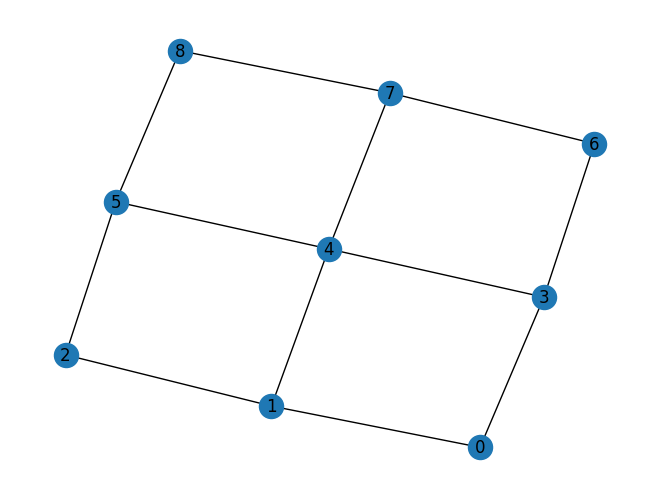

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

In [3]:
alice = rede.get_host(6)
bob = rede.get_host(1)

##### Nesse sentido, primeiramente precisa-se escolher a melhor rota e seus critérios são dados pela rota com menor caminho. Para verificar isso usaremos a função short_route_valid, que irá entregar uma rota válida entre Alice e Bob. 

In [4]:
rede.networklayer.short_route_valid(8,0)

2024-09-06 15:52:46,419: Rota válida encontrada: [8, 5, 2, 1, 0]


[8, 5, 2, 1, 0]

In [5]:
rede.networklayer.get_avg_size_routes()

2024-09-06 15:52:46,508: Rota válida encontrada: [0, 1]
2024-09-06 15:52:46,524: Rota válida encontrada: [0, 1, 2]
2024-09-06 15:52:46,536: Rota válida encontrada: [0, 3]
2024-09-06 15:52:46,540: Rota válida encontrada: [0, 3, 4]
2024-09-06 15:52:46,543: Rota válida encontrada: [0, 3, 4, 5]
2024-09-06 15:52:46,547: Rota válida encontrada: [0, 3, 6]
2024-09-06 15:52:46,548: Rota válida encontrada: [0, 3, 6, 7]
2024-09-06 15:52:46,548: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-09-06 15:52:46,549: Rota válida encontrada: [1, 0]
2024-09-06 15:52:46,549: Rota válida encontrada: [1, 2]
2024-09-06 15:52:46,549: Rota válida encontrada: [1, 0, 3]
2024-09-06 15:52:46,550: Rota válida encontrada: [1, 4]
2024-09-06 15:52:46,551: Rota válida encontrada: [1, 4, 5]
2024-09-06 15:52:46,551: Rota válida encontrada: [1, 0, 3, 6]
2024-09-06 15:52:46,555: Rota válida encontrada: [1, 4, 7]
2024-09-06 15:52:46,556: Rota válida encontrada: [1, 4, 7, 8]
2024-09-06 15:52:46,557: Rota válida encontrada: [2, 

3.0

##### Para a rota ser válida, precisa-se verificar se cada canal da rede tem peloo menos 1 par EPR e se nó tem 2 qubits. Através dessas funções podemos verificar.

##### Dessa forma, vamos realizar o entanglement swapping entre Alice e Bob, o que permite criar um par de qubits emaranhados entre dois nós que não têm uma conexão direta de emaranhamento, utilizando pares intermediários.

In [6]:
rede.networklayer.entanglement_swapping(8,0)

2024-09-06 15:52:46,824: Rota válida encontrada: [8, 5, 2, 1, 0]
2024-09-06 15:52:46,830: Par EPR <quantumnet.objects.epr.Epr object at 0x78b2bcbdd220> adicionado ao canal (8, 2).
2024-09-06 15:52:46,830: Par EPR <quantumnet.objects.epr.Epr object at 0x78b2cbfdd2b0> removido do canal (8, 5).
2024-09-06 15:52:46,831: Par EPR <quantumnet.objects.epr.Epr object at 0x78b2cbfc7b00> removido do canal (5, 2).
2024-09-06 15:52:46,831: Par EPR <quantumnet.objects.epr.Epr object at 0x78b2cbfc7b00> adicionado ao canal (8, 1).
2024-09-06 15:52:46,831: Par EPR <quantumnet.objects.epr.Epr object at 0x78b2bcbdd220> removido do canal (8, 2).
2024-09-06 15:52:46,832: Par EPR <quantumnet.objects.epr.Epr object at 0x78b2cbfc7620> removido do canal (2, 1).
2024-09-06 15:52:46,834: Par EPR <quantumnet.objects.epr.Epr object at 0x78b2cbfc7620> adicionado ao canal (8, 0).
2024-09-06 15:52:46,835: Par EPR <quantumnet.objects.epr.Epr object at 0x78b2cbfc7b00> removido do canal (8, 1).
2024-09-06 15:52:46,837: 

True

In [7]:
rede.networklayer.get_avg_size_routes()

2024-09-06 15:52:46,898: Rota válida encontrada: [0, 1]
2024-09-06 15:52:46,900: Rota válida encontrada: [0, 1, 2]
2024-09-06 15:52:46,901: Rota válida encontrada: [0, 3]
2024-09-06 15:52:46,903: Rota válida encontrada: [0, 3, 4]
2024-09-06 15:52:46,904: Rota válida encontrada: [0, 8, 5]
2024-09-06 15:52:46,907: Rota válida encontrada: [0, 3, 6]
2024-09-06 15:52:46,908: Rota válida encontrada: [0, 8, 7]
2024-09-06 15:52:46,909: Rota válida encontrada: [0, 8]
2024-09-06 15:52:46,911: Rota válida encontrada: [1, 0]
2024-09-06 15:52:46,913: Rota válida encontrada: [1, 2]
2024-09-06 15:52:46,914: Rota válida encontrada: [1, 0, 3]
2024-09-06 15:52:46,916: Rota válida encontrada: [1, 4]
2024-09-06 15:52:46,917: Rota válida encontrada: [1, 4, 5]
2024-09-06 15:52:46,919: Rota válida encontrada: [1, 0, 3, 6]
2024-09-06 15:52:46,921: Rota válida encontrada: [1, 4, 7]
2024-09-06 15:52:46,922: Sem pares EPRs entre 1 e 8 na rota [1, 8]
2024-09-06 15:52:46,924: Nenhuma rota válida encontrada.
2024-0

2.6875

In [8]:
rede.get_total_useds_eprs()

2024-09-06 15:52:47,057: Eprs usados na camada PhysicalLayer: 0
2024-09-06 15:52:47,058: Eprs usados na camada LinkLayer: 0
2024-09-06 15:52:47,059: Eprs usados na camada NetworkLayer: 3


3

In [9]:
rede.get_eprs_from_edge(8,0)